<a href="https://colab.research.google.com/github/icaglar33/finalproject/blob/main/Final_project_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, Clean, Convert and Merge the datasets

In [1]:
#import os
#os._exit(00)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Function to convert quarter to date
def quarter_to_date(date_val):
    if isinstance(date_val, pd.Timestamp):
        # If 'Date' is already in datetime format, return it
        return date_val
    elif 'Q' in date_val:
        # Quarterly format (e.g., Q1 2000)
        quarter, year = date_val.split()
        month_map = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
        return f"{year}-{month_map[quarter]}-01"
    else:
        # Monthly format (e.g., 2000-01-01)
        return date_val

# Function to load and clean exit-entry data
def load_clean_exit_entry_data(file_path):
    exit_entry_data = pd.read_excel(file_path)
    exit_entry_data.info()

    # Convert 'Date' column to date
    exit_entry_data['Date'] = exit_entry_data['Date'].apply(quarter_to_date).astype('datetime64[ns]')

    # Limit data to the end of 2019
    exit_entry_data = exit_entry_data[exit_entry_data['Date'] <= '2019-12-31']

    # Data cleaning (Handling missing values)
    missing_values_entry_exit = exit_entry_data.isnull().sum()
    print(missing_values_entry_exit)

    columns_with_missing_data = exit_entry_data.columns[exit_entry_data.isnull().any()]
    for column in columns_with_missing_data:
        mean_value = exit_entry_data[column].mean()
        exit_entry_data[column].fillna(mean_value, inplace=True)

    return exit_entry_data

# Function to load and clean other datasets
def load_clean_data(file_path):
    data = pd.read_excel(file_path)
    print("Data Information:")
    print(data.info())

    # Convert 'Date' column to date
    data['Date'] = data['Date'].apply(quarter_to_date).astype('datetime64[ns]')

    # Limit data to the end of 2019
    data = data[data['Date'] <= '2019-12-31']

    missing_values = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)

    columns_with_missing_data = data.columns[data.isnull().any()]
    for column in columns_with_missing_data:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

    print("\nCleaned Data:")
    print(data.head())

    return data

# Function to merge all datasets
def merge_all_datasets(exit_entry_data_cleaned, unemployment_data_cleaned, interest_rate_data_cleaned, gdp_data_cleaned, cpi_data_cleaned):
    # Merge datasets with proper suffixes for overlapping columns
    merged_data = exit_entry_data_cleaned.merge(unemployment_data_cleaned, on='Date', how='outer', suffixes=('_exit_entry', '_unemployment')) \
                                         .merge(interest_rate_data_cleaned, on='Date', how='outer', suffixes=('_unemployment', '_interest_rate')) \
                                         .merge(gdp_data_cleaned, on='Date', how='outer', suffixes=('_interest_rate', '_gdp')) \
                                         .merge(cpi_data_cleaned, on='Date', how='outer', suffixes=('_gdp', '_cpi'))

    print(merged_data.head())
    return merged_data

# Load and clean datasets
exit_entry_data_cleaned = load_clean_exit_entry_data("/content/drive/MyDrive/project data/entry_exit_data.xlsx")
unemployment_data_cleaned = load_clean_data("/content/drive/MyDrive/project data/unemployment_data.xlsx")
interest_rate_data_cleaned = load_clean_data("/content/drive/MyDrive/project data/interest_rate_data.xlsx")
gdp_data_cleaned = load_clean_data("/content/drive/MyDrive/project data/gdp_data.xlsx")
cpi_data_cleaned = load_clean_data("/content/drive/MyDrive/project data/cpi_data.xlsx")

# Merge all datasets
merged_data = merge_all_datasets(exit_entry_data_cleaned, unemployment_data_cleaned, interest_rate_data_cleaned, gdp_data_cleaned, cpi_data_cleaned)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        80 non-null     object 
 1   Entry rate  76 non-null     float64
 2   Exit rate   80 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
Date          0
Entry rate    4
Exit rate     0
dtype: int64
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               94 non-null     object 
 1   Unemployment Rate  94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Missing Values:
Date                 0
Unemployment Rate    0
dtype: int64

Cleaned Data:
        Date  Unemployment Rate
0 2000-01-01           6.866667
1 2000-04-01           6.666667
2 2000-07-01           6

# EDA Report

In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [5]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

# Generate EDA report
profile = ProfileReport(merged_data, title='Exploratory Data Analysis Report', explorative=True)

# Save EDA report as HTML
html_report_path = 'eda_report.html'
profile.to_file(html_report_path)

print(f'EDA report saved as {html_report_path}.')

<ipython-input-5-2230f1436957>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved as eda_report.html.


# Formatting

In [6]:
# Display the original variable names
print("Original Variable Names:")
print(merged_data.columns)

# Create a mapping for consistent names
name_mapping = {
    'Date': 'date',
    'Number of active employer businesses in the private sector': 'active_businesses',
    'Number of entrants': 'entrants',
    'Number of exits': 'exits',
    'Entry rate': 'entry_rate',
    'Exit rate': 'exit_rate',
    'Unemployment Rate': 'unemployment_rate',
    'Long Term Interest Rate': 'interest_rate',
    'Gross domestic product at market prices': 'gdp',
    'Inflation Rate': 'cpi',
}

# Rename the columns using the mapping
merged_data.rename(columns=name_mapping, inplace=True)

# Display the new variable names
print("\nNew Variable Names:")
print(merged_data.columns)


Original Variable Names:
Index(['Date', 'Entry rate', 'Exit rate', 'Unemployment Rate',
       'Long Term Interest Rate', 'Gross domestic product at market prices',
       'Inflation Rate'],
      dtype='object')

New Variable Names:
Index(['date', 'entry_rate', 'exit_rate', 'unemployment_rate', 'interest_rate',
       'gdp', 'cpi'],
      dtype='object')


# Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select relevant features and target variables
features = ['unemployment_rate', 'interest_rate', 'gdp', 'cpi']
target_entry = 'entry_rate'
target_exit = 'exit_rate'

# Drop rows with missing values in the selected features and target variables
data_entry = merged_data.dropna(subset=features + [target_entry])
data_exit = merged_data.dropna(subset=features + [target_exit])

# Split the data into training and testing sets for entry rate
X_train_entry, X_test_entry, y_train_entry, y_test_entry = train_test_split(
    data_entry[features], data_entry[target_entry], test_size=0.2, random_state=42
)

# Split the data into training and testing sets for exit rate
X_train_exit, X_test_exit, y_train_exit, y_test_exit = train_test_split(
    data_exit[features], data_exit[target_exit], test_size=0.2, random_state=42
)

# Initialize the decision tree model for entry rate
tree_model_entry = DecisionTreeRegressor(random_state=42)

# Train the model for entry rate
tree_model_entry.fit(X_train_entry, y_train_entry)

# Make predictions on the testing set for entry rate
tree_predictions_entry = tree_model_entry.predict(X_test_entry)

# Evaluate the model for entry rate
tree_mse_entry = mean_squared_error(y_test_entry, tree_predictions_entry)
print(f'Decision Tree (Entry Rate) Mean Squared Error: {tree_mse_entry}')

# Repeating the process for exit rate (similar steps as above)
# Initialize the decision tree model for exit rate
tree_model_exit = DecisionTreeRegressor(random_state=42)

# Train the model for exit rate
tree_model_exit.fit(X_train_exit, y_train_exit)

# Make predictions on the testing set for exit rate
tree_predictions_exit = tree_model_exit.predict(X_test_exit)

# Evaluate the model for exit rate
tree_mse_exit = mean_squared_error(y_test_exit, tree_predictions_exit)
print(f'Decision Tree (Exit Rate) Mean Squared Error: {tree_mse_exit}')


Decision Tree (Entry Rate) Mean Squared Error: 0.96439375
Decision Tree (Exit Rate) Mean Squared Error: 0.15196874999999982


In [8]:
import numpy as np

# Create a DataFrame for future quarters (2020Q1 to 2030Q4)
future_quarters = pd.date_range(start='2020-01-01', end='2030-12-31', freq='Q')
future_data = pd.DataFrame({'Date': future_quarters})

# Include relevant features
np.random.seed(42)
future_data['unemployment_rate'] = np.random.uniform(3, 6, size=len(future_data))
future_data['interest_rate'] = np.random.uniform(1, 5, size=len(future_data))
future_data['gdp'] = np.random.uniform(10000, 50000, size=len(future_data))
future_data['cpi'] = np.random.uniform(1, 3, size=len(future_data))

# Make predictions for entry rate and exit rate
predictions_entry = tree_model_entry.predict(future_data[features])
predictions_exit = tree_model_exit.predict(future_data[features])

# Add predicted values to the future_data DataFrame
future_data['Predicted_Entry_Rate'] = predictions_entry
future_data['Predicted_Exit_Rate'] = predictions_exit

# Display the prediction results
print(future_data[['Date', 'Predicted_Entry_Rate', 'Predicted_Exit_Rate']])

         Date  Predicted_Entry_Rate  Predicted_Exit_Rate
0  2020-03-31                 12.58                11.27
1  2020-06-30                 12.81                12.25
2  2020-09-30                 12.19                11.09
3  2020-12-31                 12.32                11.27
4  2021-03-31                 12.32                11.09
5  2021-06-30                 12.19                11.09
6  2021-09-30                 12.81                12.22
7  2021-12-31                 12.81                12.84
8  2022-03-31                 12.81                12.84
9  2022-06-30                 12.81                12.09
10 2022-09-30                 12.32                11.09
11 2022-12-31                 12.81                12.09
12 2023-03-31                 12.19                11.27
13 2023-06-30                 12.58                11.27
14 2023-09-30                 11.91                11.09
15 2023-12-31                 12.19                11.09
16 2024-03-31                 1

**Evaluation Metrics:**

In [9]:
# Mean Squared Error (MSE):

print(f'Decision Tree (Entry Rate) Mean Squared Error: {tree_mse_entry}')
print(f'Decision Tree (Exit Rate) Mean Squared Error: {tree_mse_exit}')

Decision Tree (Entry Rate) Mean Squared Error: 0.96439375
Decision Tree (Exit Rate) Mean Squared Error: 0.15196874999999982


In [10]:
# R-squared (R2):

from sklearn.metrics import r2_score

r2_entry = r2_score(y_test_entry, tree_predictions_entry)
r2_exit = r2_score(y_test_exit, tree_predictions_exit)

print(f'Decision Tree (Entry Rate) R-squared: {r2_entry}')
print(f'Decision Tree (Exit Rate) R-squared: {r2_exit}')

Decision Tree (Entry Rate) R-squared: 0.12366782406381482
Decision Tree (Exit Rate) R-squared: 0.6659014965902275


In [11]:
# Overfitting:

tree_predictions_entry_train = tree_model_entry.predict(X_train_entry)
tree_mse_entry_train = mean_squared_error(y_train_entry, tree_predictions_entry_train)

tree_predictions_exit_train = tree_model_exit.predict(X_train_exit)
tree_mse_exit_train = mean_squared_error(y_train_exit, tree_predictions_exit_train)

print(f'Decision Tree (Entry Rate) Train Mean Squared Error: {tree_mse_entry_train}')
print(f'Decision Tree (Exit Rate) Train Mean Squared Error: {tree_mse_exit_train}')

Decision Tree (Entry Rate) Train Mean Squared Error: 0.0
Decision Tree (Exit Rate) Train Mean Squared Error: 0.0


In [12]:
# Cross-Validation

from sklearn.model_selection import cross_val_score

# For entry rate
cross_val_scores_entry = cross_val_score(tree_model_entry, data_entry[features], data_entry[target_entry], cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE (Entry Rate): {np.mean(-cross_val_scores_entry)}')

# For exit rate
cross_val_scores_exit = cross_val_score(tree_model_exit, data_exit[features], data_exit[target_exit], cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE (Exit Rate): {np.mean(-cross_val_scores_exit)}')

Cross-Validation MSE (Entry Rate): 1.1120510180055405
Cross-Validation MSE (Exit Rate): 0.39122874999999996


In [13]:
# Comparison with Liner Regression

from sklearn.linear_model import LinearRegression

# For entry rate
linear_model_entry = LinearRegression()
linear_model_entry.fit(X_train_entry, y_train_entry)
linear_predictions_entry = linear_model_entry.predict(X_test_entry)
linear_mse_entry = mean_squared_error(y_test_entry, linear_predictions_entry)
print(f'Linear Regression (Entry Rate) Mean Squared Error: {linear_mse_entry}')

# For exit rate
linear_model_exit = LinearRegression()
linear_model_exit.fit(X_train_exit, y_train_exit)
linear_predictions_exit = linear_model_exit.predict(X_test_exit)
linear_mse_exit = mean_squared_error(y_test_exit, linear_predictions_exit)
print(f'Linear Regression (Exit Rate) Mean Squared Error: {linear_mse_exit}')


Linear Regression (Entry Rate) Mean Squared Error: 0.6172386859132213
Linear Regression (Exit Rate) Mean Squared Error: 0.11295939204893843


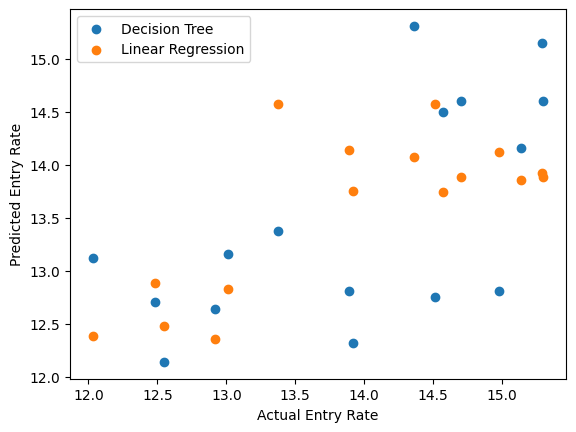

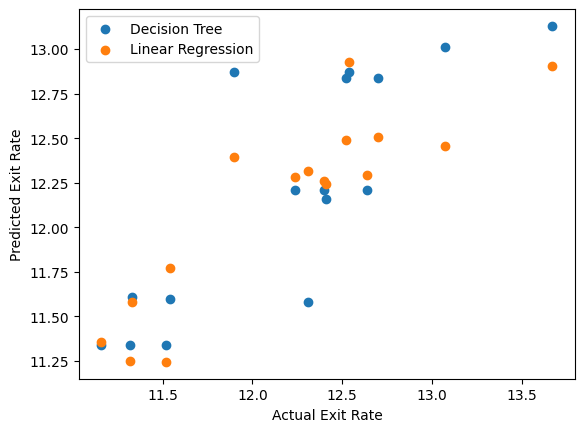

In [14]:
import matplotlib.pyplot as plt

# For entry rate
plt.scatter(y_test_entry, tree_predictions_entry, label='Decision Tree')
plt.scatter(y_test_entry, linear_predictions_entry, label='Linear Regression')
plt.xlabel('Actual Entry Rate')
plt.ylabel('Predicted Entry Rate')
plt.legend()
plt.show()

# For exit rate
plt.scatter(y_test_exit, tree_predictions_exit, label='Decision Tree')
plt.scatter(y_test_exit, linear_predictions_exit, label='Linear Regression')
plt.xlabel('Actual Exit Rate')
plt.ylabel('Predicted Exit Rate')
plt.legend()
plt.show()

# Linear Regression Model

In [15]:
# Select relevant features for entry rate prediction
X_future_entry = future_data[['unemployment_rate', 'interest_rate', 'gdp', 'cpi']]

# Ensure that 'X_future_entry' is a 2D array
X_future_entry = X_future_entry.values.reshape(-1, len(features))

# Make predictions for entry rate using linear regression model
future_predictions_entry = linear_model_entry.predict(X_future_entry)

# Create a DataFrame to store predictions along with dates
future_predictions_entry_df = pd.DataFrame({
    'Date': future_data['Date'],  # Assuming 'Date' is the column with dates in future_data
    'Predicted_Entry_Rate': future_predictions_entry
})

# Select relevant features for exit rate prediction
X_future_exit = future_data[['unemployment_rate', 'interest_rate', 'gdp', 'cpi']]

# Ensure that 'X_future_exit' is a 2D array
X_future_exit = X_future_exit.values.reshape(-1, len(features))

# Make predictions for exit rate using linear regression model
future_predictions_exit = linear_model_exit.predict(X_future_exit)

# Create a DataFrame to store predictions along with dates
future_predictions_exit_df = pd.DataFrame({
    'Date': future_data['Date'],  # Assuming 'Date' is the column with dates in future_data
    'Predicted_Exit_Rate': future_predictions_exit
})

# Print or analyze the predictions
print("Linear Regression (Entry Rate) Predictions:")
print(future_predictions_entry_df)

print("\nLinear Regression (Exit Rate) Predictions:")
print(future_predictions_exit_df)



Linear Regression (Entry Rate) Predictions:
         Date  Predicted_Entry_Rate
0  2020-03-31             19.153673
1  2020-06-30             18.863305
2  2020-09-30             19.331400
3  2020-12-31             19.159167
4  2021-03-31             19.780636
5  2021-06-30             19.737271
6  2021-09-30             20.003299
7  2021-12-31             19.370948
8  2022-03-31             19.741588
9  2022-06-30             19.205932
10 2022-09-30             20.033786
11 2022-12-31             18.986885
12 2023-03-31             18.747454
13 2023-06-30             19.290791
14 2023-09-30             19.617727
15 2023-12-31             19.665120
16 2024-03-31             19.253963
17 2024-06-30             19.154735
18 2024-09-30             19.863830
19 2024-12-31             19.378568
20 2025-03-31             18.986636
21 2025-06-30             19.861850
22 2025-09-30             19.754520
23 2025-12-31             19.576461
24 2026-03-31             19.282541
25 2026-06-30       

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
